<a href="https://colab.research.google.com/github/hnushrat/NYC-Taxi/blob/main/NYC_Taxi(Feature_Engineering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VendorID**

* A code indicating the TPEP provider that provided the record.
    * Creative Mobile Technologies
    * VeriFone Inc.


**tpep_pickup_datetime**
* The date and time when the meter was engaged.

**tpep_dropoff_datetime**
* The date and time when the meter was disengaged.

**Passenger_count**
*   The number of passengers in the vehicle. This is a driver-entered value.

**Trip_distance**
*   The elapsed trip distance in miles reported by the taximeter.

**RateCodeID**
*   The final rate code in effect at the end of the trip.
    *   Standard rate
    *   JFK
    *   Newark
    *   Nassau or Westchester
    *   Negotiated fare
    *   Group ride

**Store_and_fwd_flag**
*   This flag indicates whether the trip record was held in vehicle memory before sending to the vendor,
aka “store and forward,” because the vehicle did not have a connection to the server.
    *   Y= store and forward trip
    *   N= not a store and forward trip


**Payment_type**
*   A numeric code signifying how the passenger paid for the trip.
    *   Credit card
    *   Cash
    *   No charge
    *   Dispute
    *   Unknown
    *   Voided trip

**Fare_amount**
*   The time-and-distance fare calculated by the meter.

**Extra**
*   Miscellaneous extras and surcharges. Currently, this only includes.

**MTA_tax**
*   0.50 MTA tax that is automatically triggered based on the metered rate in use.


**Improvement_surcharge**
*   0.30 improvement surcharge assessed trips at the flag drop. the improvement surcharge began being levied in 2015.


**Tip_amount**
*   This field is automatically populated for credit card tips.Cash tips are not included.

**Tolls_amount**
*   Total amount of all tolls paid in trip.

**Total_amount**
*   The total amount charged to passengers. Does not include cash tips.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

plt.rcParams["figure.figsize"] = (15,3)

In [2]:
df = pd.read_parquet('/content/yellow_tripdata_2024-12.parquet')

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-12-01 00:12:27,2024-12-01 00:31:12,1.0,9.76,1.0,N,138,33,1,38.0,6.0,0.5,4.72,0.00,1.0,51.97,0.0,1.75
1,2,2024-11-30 23:56:04,2024-12-01 00:28:15,1.0,7.62,1.0,N,158,42,1,37.3,1.0,0.5,8.46,0.00,1.0,50.76,2.5,0.00
2,2,2024-12-01 00:50:35,2024-12-01 01:24:46,4.0,20.07,2.0,N,132,236,2,70.0,0.0,0.5,0.00,6.94,1.0,82.69,2.5,1.75
3,2,2024-12-01 00:18:16,2024-12-01 00:33:16,3.0,2.34,1.0,N,142,186,1,15.6,1.0,0.5,4.12,0.00,1.0,24.72,2.5,0.00
4,2,2024-12-01 00:56:13,2024-12-01 01:18:25,1.0,5.05,1.0,N,107,80,1,26.8,1.0,0.5,5.00,0.00,1.0,36.80,2.5,0.00


In [4]:
# negative fare amounts are erronous
df = df[df['fare_amount'] >= 0]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3589927 entries, 0 to 3668370
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

In [6]:
# get missing values
df.isna().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,316585
trip_distance,0
RatecodeID,316585
store_and_fwd_flag,316585
PULocationID,0
DOLocationID,0
payment_type,0


In [7]:
df.dropna(inplace = True)

In [8]:
# get duration of the journey in minutes

df['duration_of_journey'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration_of_journey'] = df['duration_of_journey'].dt.seconds/60

In [9]:
# get booking hour of the day
df['booking_hour'] = df['tpep_pickup_datetime'].dt.hour

In [10]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration_of_journey,booking_hour
0,2,2024-12-01 00:12:27,2024-12-01 00:31:12,1.0,9.76,1.0,N,138,33,1,38.0,6.0,0.5,4.72,0.00,1.0,51.97,0.0,1.75,18.750000,0
1,2,2024-11-30 23:56:04,2024-12-01 00:28:15,1.0,7.62,1.0,N,158,42,1,37.3,1.0,0.5,8.46,0.00,1.0,50.76,2.5,0.00,32.183333,23
2,2,2024-12-01 00:50:35,2024-12-01 01:24:46,4.0,20.07,2.0,N,132,236,2,70.0,0.0,0.5,0.00,6.94,1.0,82.69,2.5,1.75,34.183333,0
3,2,2024-12-01 00:18:16,2024-12-01 00:33:16,3.0,2.34,1.0,N,142,186,1,15.6,1.0,0.5,4.12,0.00,1.0,24.72,2.5,0.00,15.000000,0
4,2,2024-12-01 00:56:13,2024-12-01 01:18:25,1.0,5.05,1.0,N,107,80,1,26.8,1.0,0.5,5.00,0.00,1.0,36.80,2.5,0.00,22.200000,0


#### Find the day of the week with most bookings

In [11]:
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

In [12]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration_of_journey,booking_hour,day
0,2,2024-12-01 00:12:27,2024-12-01 00:31:12,1.0,9.76,1.0,N,138,33,1,38.0,6.0,0.5,4.72,0.00,1.0,51.97,0.0,1.75,18.750000,0,Sunday
1,2,2024-11-30 23:56:04,2024-12-01 00:28:15,1.0,7.62,1.0,N,158,42,1,37.3,1.0,0.5,8.46,0.00,1.0,50.76,2.5,0.00,32.183333,23,Saturday
2,2,2024-12-01 00:50:35,2024-12-01 01:24:46,4.0,20.07,2.0,N,132,236,2,70.0,0.0,0.5,0.00,6.94,1.0,82.69,2.5,1.75,34.183333,0,Sunday
3,2,2024-12-01 00:18:16,2024-12-01 00:33:16,3.0,2.34,1.0,N,142,186,1,15.6,1.0,0.5,4.12,0.00,1.0,24.72,2.5,0.00,15.000000,0,Sunday
4,2,2024-12-01 00:56:13,2024-12-01 01:18:25,1.0,5.05,1.0,N,107,80,1,26.8,1.0,0.5,5.00,0.00,1.0,36.80,2.5,0.00,22.200000,0,Sunday


In [13]:
# dropping 'PULocationID' and 'DOLocationID', since they don't have any info about exact location coords
df.drop(['PULocationID', 'DOLocationID', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis = 1, inplace = True)

In [14]:
df.reset_index(drop = True, inplace = True)

In [15]:
df

,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration_of_journey,booking_hour,day
0,1.0,9.76,1.0,N,1,38.0,6.0,0.5,4.72,0.00,1.0,51.97,0.0,1.75,18.750000,0,Sunday
1,1.0,7.62,1.0,N,1,37.3,1.0,0.5,8.46,0.00,1.0,50.76,2.5,0.00,32.183333,23,Saturday
2,4.0,20.07,2.0,N,2,70.0,0.0,0.5,0.00,6.94,1.0,82.69,2.5,1.75,34.183333,0,Sunday
3,3.0,2.34,1.0,N,1,15.6,1.0,0.5,4.12,0.00,1.0,24.72,2.5,0.00,15.000000,0,Sunday
4,1.0,5.05,1.0,N,1,26.8,1.0,0.5,5.00,0.00,1.0,36.80,2.5,0.00,22.200000,0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3273337,1.0,1.90,1.0,N,1,12.1,1.0,0.5,1.88,0.00,1.0,18.98,2.5,0.00,9.400000,22,Tuesday
3273338,1.0,3.88,1.0,N,2,19.1,1.0,0.5,0.00,0.00,1.0,24.10,2.5,0.00,13.916667,23,Tuesday
3273339,1.0,5.53,1.0,N,1,29.6,1.0,0.5,2.00,0.00,1.0,36.60,2.5,0.00,26.116667,23,Tuesday
3273340,1.0,0.89,1.0,N,1,9.3,1.0,0.5,2.14,0.00,1.0,16.44,2.5,0.00,8.483333,23,Tuesday


# Feature Analysis

In [16]:
pd.value_counts(df['passenger_count'])

,count
passenger_count,
1.0,2483521
2.0,494920
3.0,130157
4.0,97998
0.0,30390
5.0,22184
6.0,14154
8.0,9
7.0,7


### Passenger count of 0 and more than 4 are highly unlikely, let's focus on the possible values

In [17]:
df = df[df['passenger_count'].isin(np.arange(1,5))].reset_index(drop = True)

<Axes: ylabel='trip_distance'>

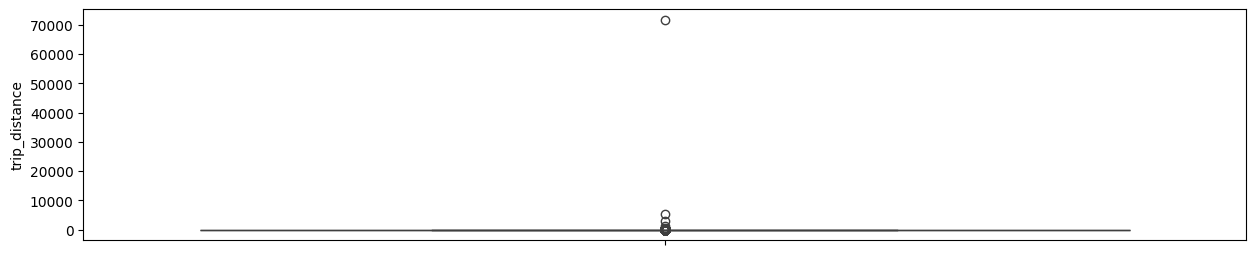

In [18]:
sns.boxplot(df['trip_distance'])

In [19]:
df['trip_distance'].min(), df['trip_distance'].max()

(0.0, 71761.53)

#### We can see the trip distance has outliers, and max value is unexpected

In [20]:
df = df.drop(index = df[df['trip_distance'] == df['trip_distance'].max()].index)

In [21]:
# let's calculate the outliers

def filter_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  upper_limit = Q3 + 1.5 * IQR
  lower_limit = Q1 - 1.5 * IQR

  return lower_limit, upper_limit

In [22]:
lower_limit, upper_limit = filter_outliers(df, 'trip_distance')
print(lower_limit, upper_limit)

-2.355 6.484999999999999


In [23]:
# let's find the percentage of outliers

print((df['trip_distance'] > upper_limit).sum() / len(df) * 100)

# let's get their indices and drop them
outlier_indices = df[df['trip_distance'] > upper_limit].index
df.drop(outlier_indices, inplace = True)

13.34072435090805


In [24]:
df.reset_index(drop = True, inplace = True)

In [25]:
pd.value_counts(df['congestion_surcharge'])

,count
congestion_surcharge,
2.50,2662517
0.00,115822
-2.50,469
1.00,3
0.75,1


#### We see 'congestion_surcharge' is negative, let's drop it as it is not possible

In [26]:
df = df[df['congestion_surcharge'] >= 0].reset_index(drop = True)

In [27]:
pd.value_counts(df['RatecodeID'])

,count
RatecodeID,
1.0,2728553
5.0,22286
99.0,20083
2.0,5411
3.0,1523
4.0,483
6.0,4


In [28]:
pd.value_counts(df['store_and_fwd_flag'])

,count
store_and_fwd_flag,
N,2763857
Y,14486


In [29]:
pd.value_counts(df['payment_type'])

,count
payment_type,
1,2319976
2,403312
4,38589
3,16466


In [30]:
(df['fare_amount']).min(), (df['fare_amount']).max()

(0.0, 3033.1)

#### We observe that samples also contain 'fare_amount' to be 0, which is impossible

In [31]:
df = df[df['fare_amount'] > 0]

<Axes: ylabel='fare_amount'>

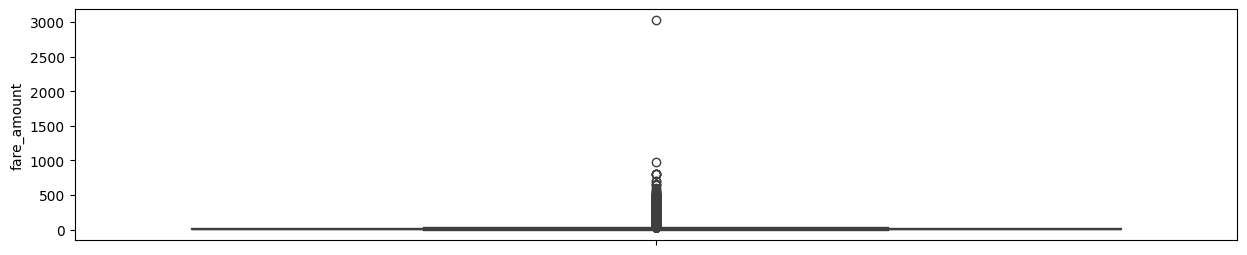

In [32]:
sns.boxplot(df['fare_amount'])

In [33]:
ll_fare, ul_fare = filter_outliers(df, 'fare_amount') # ll = lower_limit; ul = upper_limit;

In [34]:
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] <= ul_fare)]

In [35]:
df

,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration_of_journey,booking_hour,day
0,3.0,2.34,1.0,N,1,15.6,1.0,0.5,4.12,0.0,1.0,24.72,2.5,0.0,15.000000,0,Sunday
1,1.0,5.05,1.0,N,1,26.8,1.0,0.5,5.00,0.0,1.0,36.80,2.5,0.0,22.200000,0,Sunday
2,1.0,4.30,1.0,N,1,20.5,3.5,0.5,5.10,0.0,1.0,30.60,2.5,0.0,16.083333,0,Sunday
3,1.0,0.30,1.0,N,3,5.8,3.5,0.5,0.00,0.0,1.0,10.80,2.5,0.0,4.750000,0,Sunday
4,2.0,0.72,1.0,N,1,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.0,5.100000,0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778338,1.0,2.01,1.0,N,1,14.9,1.0,0.5,3.98,0.0,1.0,23.88,2.5,0.0,14.350000,23,Tuesday
2778339,1.0,1.90,1.0,N,1,12.1,1.0,0.5,1.88,0.0,1.0,18.98,2.5,0.0,9.400000,22,Tuesday
2778340,1.0,3.88,1.0,N,2,19.1,1.0,0.5,0.00,0.0,1.0,24.10,2.5,0.0,13.916667,23,Tuesday
2778341,1.0,5.53,1.0,N,1,29.6,1.0,0.5,2.00,0.0,1.0,36.60,2.5,0.0,26.116667,23,Tuesday


In [36]:
# let's encode few features to one-hot

def get_dummies(dataframe, columns):
  for column in columns:
    dummies = pd.get_dummies(dataframe[column], prefix = column).astype('int')
    dataframe = pd.concat([dataframe, dummies], axis = 1)
    dataframe.drop(column, axis = 1, inplace = True)
  return dataframe

df = get_dummies(df, columns = ['store_and_fwd_flag', 'payment_type', 'RatecodeID', 'day'])

In [37]:
df

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration_of_journey,booking_hour,store_and_fwd_flag_N,store_and_fwd_flag_Y,payment_type_1,payment_type_2,payment_type_3,payment_type_4,RatecodeID_1.0,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,RatecodeID_6.0,RatecodeID_99.0,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,3.0,2.34,15.6,1.0,0.5,4.12,0.0,1.0,24.72,2.5,0.0,15.000000,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1.0,5.05,26.8,1.0,0.5,5.00,0.0,1.0,36.80,2.5,0.0,22.200000,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1.0,4.30,20.5,3.5,0.5,5.10,0.0,1.0,30.60,2.5,0.0,16.083333,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1.0,0.30,5.8,3.5,0.5,0.00,0.0,1.0,10.80,2.5,0.0,4.750000,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2.0,0.72,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.0,5.100000,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778338,1.0,2.01,14.9,1.0,0.5,3.98,0.0,1.0,23.88,2.5,0.0,14.350000,23,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2778339,1.0,1.90,12.1,1.0,0.5,1.88,0.0,1.0,18.98,2.5,0.0,9.400000,22,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2778340,1.0,3.88,19.1,1.0,0.5,0.00,0.0,1.0,24.10,2.5,0.0,13.916667,23,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2778341,1.0,5.53,29.6,1.0,0.5,2.00,0.0,1.0,36.60,2.5,0.0,26.116667,23,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
